# Working Through Odient() Docs From SciPy
## Inverted Pendulum

In [20]:
import numpy as np
from scipy.integrate import odeint, solve_ivp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [12]:
#Inverted pendulum example:

#Governing Equations
#theta''(t) + b*theta'(t) + c*sin(theta(t)) = 0
#theta'(t) = omega(t)
#omega'(t) = -b*omega(t) - c*sin(theta(t))

def pend(y, t, b, c):
    theta, omega = y
    dydt = [omega, -b*omega - c*np.sin(theta)]
    return dydt

In [13]:
#constants
b = 0.25
c = 5.0
y0 = [np.pi - 0.1, 0.0]
t = np.linspace(0, 10, 101)

In [14]:
#solving the differential equation
#pend: Function
#y0: IC
#t: Time vector
#args: Constants to pass in
sol = odeint(pend, y0, t, args=(b, c))

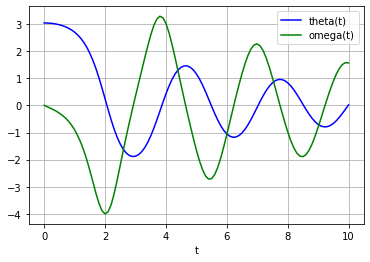

In [15]:
plt.plot(t, sol[:, 0], 'b', label='theta(t)')
plt.plot(t, sol[:, 1], 'g', label='omega(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

## Lorenz System

In [18]:
def lorenz(t, state, sigma, beta, rho):
    x, y, z = state
     
    dx = sigma * (y - x)
    dy = x * (rho - z) - y
    dz = x * y - beta * z
     
    return [dx, dy, dz]
 
sigma = 10.0
beta = 8.0 / 3.0
rho = 28.0
 
p = (sigma, beta, rho)  # Parameters of the system
y0 = [1.0, 1.0, 1.0]  # Initial state of the system
t_span = (0.0, 40.0)
t = np.arange(0.0, 40.0, 0.01)

Text(0.5, 0.92, 'solve_ivp')

<Figure size 432x288 with 0 Axes>

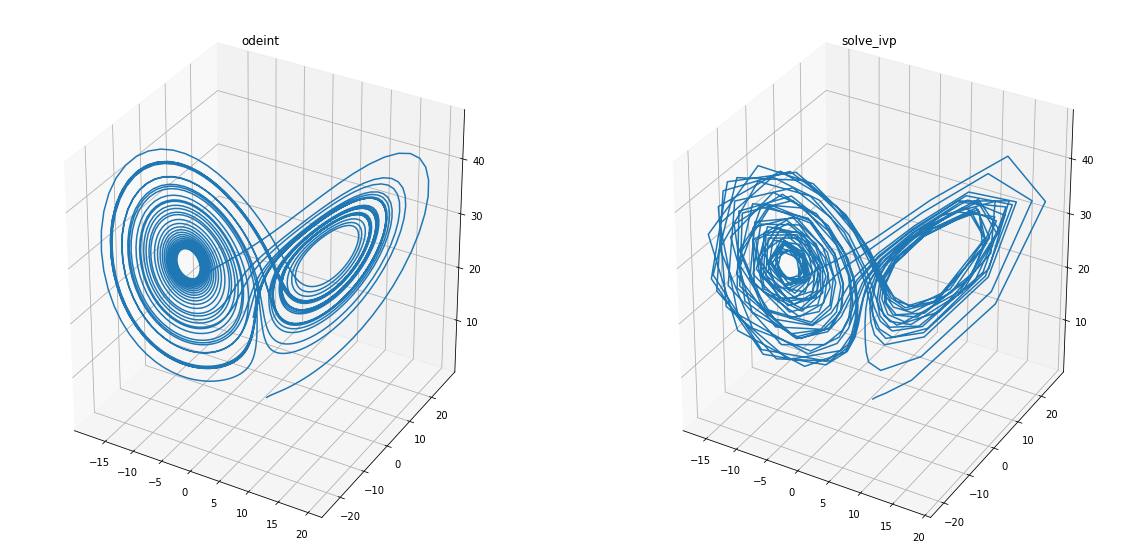

In [28]:
result_odeint = odeint(lorenz, y0, t, p, tfirst=True)
result_solve_ivp = solve_ivp(lorenz, t_span, y0, args=p)
 
fig = plt.figure()
fig = plt.figure(figsize=(20.,10.))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot(result_odeint[:, 0],
        result_odeint[:, 1],
        result_odeint[:, 2])
ax.set_title("odeint")
 
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot(result_solve_ivp.y[0, :],
        result_solve_ivp.y[1, :],
        result_solve_ivp.y[2, :])
ax.set_title("solve_ivp")